## Lab: Pythagorean Expectation for NBA

### On You Own: Deriving the Exponent for NBA Pythagorean Expectation

In this lab, you will perform the same analysis for the NBA reusing (almost exactly) the same code from the demo on Pythagorean Expectation for MLB but tweaked whereever necessary.  If you are unsure how to do something, just look to the corresponding part of the MLB section and emulate the code.  The data is loaded in the first cell.

The columns (excluding some self-explanatory ones):
+ `lg_id`: League ID
+ `mp`: minutes played
+ `pts`: points scored
+ `opp_pts`: opponent points scored

**IMPORTANT TIP**: Reuse the code from the demo on Pythagorean Expectation for MLB as much as possible.  You should be able to reuse basically all of it and rename a few things here and there.  It should all work to produce the results for this lab!  

## Setup (Do Not Change)

In [93]:
%run ../../utils/notebook_setup.py

import numpy as np

from datascience import Table
from datascience_stats import linear_fit
import numpy as np

usecols = ['wins','losses','g','pts','opp_pts','year','team_id']

nba = Table.read_table(
    "nba_team_season_data.csv",
    usecols=usecols
)

nba.show(5)

Adding datascience helper tools to path...
Setting up Matplotlib...
Matplotlib imported as mpl
Matplotlib.pyplot imported as plt


lg_id,wins,losses,team_id,g,mp,pts,opp_pts,year,team
NBA,35,47,ATL,82,19755,8907,9024,1973-74,ATL
NBA,36,46,SEA,82,19755,8774,8983,1973-74,OKC
NBA,47,35,CAP,82,19730,8353,8231,1973-74,WAS
NBA,54,28,CHI,82,19780,8368,8097,1973-74,CHI
NBA,49,33,NYK,82,19780,8306,8080,1973-74,NYK


### 1. The first thing we need to do is compute the winning percentage 
$$
    \text{Win Pct} = W / G
$$

In [94]:
nba['Wpct'] = nba.column('wins')/nba.column('g')

### 2. Then we need to compute Points per Game values
\begin{align*}
    \text{Points For per Game} & = \text{Points For}\ /\ \text{Game} \\
    \text{Points Against per Game} & = \text{Points Against}\ /\ \text{Game} \\
    \text{Net Points per Game} & = \text{Points For per Game} - \text{Points Against per Game}
\end{align*}

Call the columns `ppg`, `opp_ppg`, and `net_ppg`.

*Note: Feel free to perform the analysis using Ratings, which provide points per 100 possessions, provided in the NBA dataset (you will need to change the data loading to include those columns).  The results will be identical.

_Question_

We're computing a per game value.  Should we use 82 or should we use something else?  What happened in the NBA recently (~2011) that might necessitate not using 82?

In [95]:
nba['ppg'] = nba.column('pts')/nba.column('g')
nba['opp_ppg'] = nba.column('opp_pts')/nba.column('g')
nba['net_ppg'] = nba.column('ppg') - nba.column('opp_ppg')
nba

lg_id,wins,losses,team_id,g,mp,pts,opp_pts,year,team,Wpct,ppg,opp_ppg,net_ppg
NBA,35,47,ATL,82,19755,8907,9024,1973-74,ATL,0.426829,108.622,110.049,-1.42683
NBA,36,46,SEA,82,19755,8774,8983,1973-74,OKC,0.439024,107,109.549,-2.54878
NBA,47,35,CAP,82,19730,8353,8231,1973-74,WAS,0.573171,101.866,100.378,1.4878
NBA,54,28,CHI,82,19780,8368,8097,1973-74,CHI,0.658537,102.049,98.7439,3.30488
NBA,49,33,NYK,82,19780,8306,8080,1973-74,NYK,0.597561,101.293,98.5366,2.7561
NBA,29,53,CLE,82,19755,8221,8576,1973-74,CLE,0.353659,100.256,104.585,-4.32927
NBA,56,26,BOS,82,19780,8937,8616,1973-74,BOS,0.682927,108.988,105.073,3.91463
NBA,30,52,PHO,82,19755,8847,9139,1973-74,PHO,0.365854,107.89,111.451,-3.56098
ABA,37,47,DNR,84,20285,8989,9032,1973-74,DEN,0.440476,107.012,107.524,-0.511905
ABA,55,29,NYA,84,20285,9188,8739,1973-74,NJN,0.654762,109.381,104.036,5.34524


Show the top 10 team seasons by Net Points per Game.  Only show the following columns: `team_id, wins, losses, ppg, opp_ppg, net_ppg`

In [96]:
nba.sort('net_ppg', descending=True).select('team_id', 'wins', 'losses', 'ppg', 'opp_ppg', 'net_ppg').show(10)

team_id,wins,losses,ppg,opp_ppg,net_ppg
CHI,72,10,105.183,92.939,12.2439
GSW,67,15,115.89,104.256,11.6341
CHI,69,13,103.146,92.3415,10.8049
GSW,73,9,114.89,104.134,10.7561
SAS,67,15,103.537,92.9024,10.6341
CHI,67,15,109.89,99.4512,10.439
BOS,66,16,100.549,90.2927,10.2561
GSW,67,15,109.951,99.8537,10.0976
BOS,67,15,114.134,104.72,9.41463
LAL,65,17,117.756,108.451,9.30488


### 3. Compute the Linear Model
$$
    \text{Linear Win Pct} = \alpha  + \beta \cdot \text{Net Points per Game}
$$
where $\alpha$ gives $\text{Average Win Pct}$ and $\beta$ gives $\text{Win Pct per Net Points per Game}$.

Plot the linear model results as we did with MLB.

**Remember: Reuse the code from the MLB demo!**


_Question_

For what values of Net Points per Game does $\text{Linear Win Pct} < 0$ and $\text{Linear Win Pct} > 1$?  How much of an issue is that here compared to when we looked at MLB data?

_Answer_

For Net Points Per Game (net_ppg) values of less than 0, the Linear Win Percent (LinWPCT) is < 0; for net_ppg values of more than 0, the LinWPCT is > 1. There isn't muuch of an issue here because with the MLB data we cannot deduce an association between Run Differential (RB) and LinWPCT because LinWPCT values are negative and positive when RD is negative or positive. 

In [97]:
params, predictions, errors = linear_fit(nba['net_ppg'], nba['Wpct'])
nba['LinWpct'] = predictions

alpha, beta = params
print("Computed Linear Model:")
print("====================")
s = "LinWpct = {alpha:.3f} + {beta:.3f} * net_ppg".format(alpha=alpha, beta=beta)
print(s)

Computed Linear Model:
LinWpct = 0.500 + 0.032 * net_ppg


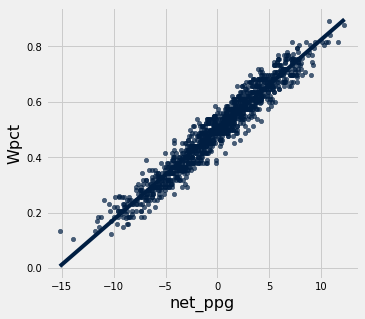

In [98]:
nba.scatter("net_ppg", select='Wpct', fit_line=True)

The estimated value of $\beta$ should be about $0.03$.

Compute the "Net PPG per Win" from the linear model.

You should get a Net PPG per win of about 0.38.

In [99]:
nba

lg_id,wins,losses,team_id,g,mp,pts,opp_pts,year,team,Wpct,ppg,opp_ppg,net_ppg,LinWpct
NBA,35,47,ATL,82,19755,8907,9024,1973-74,ATL,0.426829,108.622,110.049,-1.42683,0.453597
NBA,36,46,SEA,82,19755,8774,8983,1973-74,OKC,0.439024,107,109.549,-2.54878,0.417156
NBA,47,35,CAP,82,19730,8353,8231,1973-74,WAS,0.573171,101.866,100.378,1.4878,0.548264
NBA,54,28,CHI,82,19780,8368,8097,1973-74,CHI,0.658537,102.049,98.7439,3.30488,0.607282
NBA,49,33,NYK,82,19780,8306,8080,1973-74,NYK,0.597561,101.293,98.5366,2.7561,0.589457
NBA,29,53,CLE,82,19755,8221,8576,1973-74,CLE,0.353659,100.256,104.585,-4.32927,0.359327
NBA,56,26,BOS,82,19780,8937,8616,1973-74,BOS,0.682927,108.988,105.073,3.91463,0.627086
NBA,30,52,PHO,82,19755,8847,9139,1973-74,PHO,0.365854,107.89,111.451,-3.56098,0.384281
ABA,37,47,DNR,84,20285,8989,9032,1973-74,DEN,0.440476,107.012,107.524,-0.511905,0.483314
ABA,55,29,NYA,84,20285,9188,8739,1973-74,NJN,0.654762,109.381,104.036,5.34524,0.673552


In [100]:
(np.mean(nba['LinWpct']) - 0.5) / 0.032

0.0323308704211836

### 4. Compute the following values:
\begin{align*}
    \text{Points Ratio} & = \text{PPG}\ /\ \text{Opp PPG} \\
    \text{Log Points Ratio} & = \log \text{Points Ratio} \\
    \text{Log Odds} & = \log \text{Wins}\ /\ \text{Losses}
\end{align*}

In [101]:
nba['PR'] = nba['pts'] / nba['opp_pts']
nba['log_PR'] = np.log(nba['PR'])
nba['log_odds'] = np.log(nba['wins']/nba['losses'])
nba

lg_id,wins,losses,team_id,g,mp,pts,opp_pts,year,team,Wpct,ppg,opp_ppg,net_ppg,LinWpct,PR,log_PR,log_odds
NBA,35,47,ATL,82,19755,8907,9024,1973-74,ATL,0.426829,108.622,110.049,-1.42683,0.453597,0.987035,-0.0130502,-0.2948
NBA,36,46,SEA,82,19755,8774,8983,1973-74,OKC,0.439024,107,109.549,-2.54878,0.417156,0.976734,-0.0235411,-0.245122
NBA,47,35,CAP,82,19730,8353,8231,1973-74,WAS,0.573171,101.866,100.378,1.4878,0.548264,1.01482,0.0147132,0.2948
NBA,54,28,CHI,82,19780,8368,8097,1973-74,CHI,0.658537,102.049,98.7439,3.30488,0.607282,1.03347,0.0329213,0.65678
NBA,49,33,NYK,82,19780,8306,8080,1973-74,NYK,0.597561,101.293,98.5366,2.7561,0.589457,1.02797,0.0275863,0.395313
NBA,29,53,CLE,82,19755,8221,8576,1973-74,CLE,0.353659,100.256,104.585,-4.32927,0.359327,0.958605,-0.0422757,-0.602996
NBA,56,26,BOS,82,19780,8937,8616,1973-74,BOS,0.682927,108.988,105.073,3.91463,0.627086,1.03726,0.036579,0.767255
NBA,30,52,PHO,82,19755,8847,9139,1973-74,PHO,0.365854,107.89,111.451,-3.56098,0.384281,0.968049,-0.0324726,-0.550046
ABA,37,47,DNR,84,20285,8989,9032,1973-74,DEN,0.440476,107.012,107.524,-0.511905,0.483314,0.995239,-0.00477222,-0.23923
ABA,55,29,NYA,84,20285,9188,8739,1973-74,NJN,0.654762,109.381,104.036,5.34524,0.673552,1.05138,0.0501025,0.640037


### 5. Compute a Pythagorean exponent for the NBA

Plot the results of the model for the Pythagorean exponent.  

**Again, reuse the MLB code with appropriate changes!**

You should get a large value (around 14).  We could perform this analysis on all sorts of sports. 

_Question_

What does this large value for the exponent mean?  To answer this question, start by answering this series of questions:
+ Suppose some random sport had an exponent of $K=1\text{mil}$.  If a team is able to score just a bit more than its opponents so $\text{Points Ratio} > 1$ by a small amount.  What is $\text{Points Ratio}^K$ in this case?  What is the team's expected winning percentage?
+ Suppose as sport had an $K=0.00001$.  What is $\text{Points Ratio}^K$ in this case?  What is a team's expected winning percentage if it is able to score just a bit more than its opponents?  What about if it's outscored by a little bit?
+ Do larger or smaller values of K lead to a sport which features a lot of luck/chance in its outcomes?

_Answer_

A large value for the exponent means that a lot of points would be needed to sway the winning percentage in favor, in specific, K amount of points. In other words, K amount of points would be needed to increase the number of wins. 

In [102]:
params, predictions, errors = linear_fit(
    nba['log_PR'], nba['log_odds'], constant=False)
nba['xlog_odds'] = predictions

nba['pythag_log_odds'] = nba['log_PR'] * 2
K = params.item()

print("Computed Linear Fit:")
print("====================")
s = "xlog_odds = {K:.2f} * log_PR".format(K=K)
print(s)

Computed Linear Fit:
xlog_odds = 14.35 * log_PR


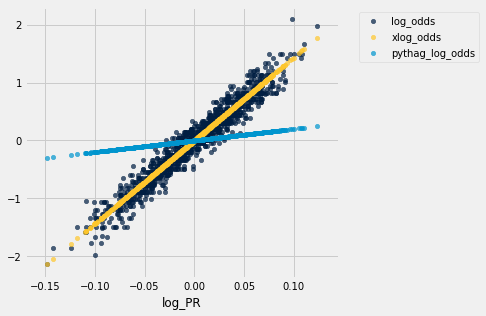

In [103]:
nba.scatter('log_PR', select=['log_odds', 'xlog_odds', 'pythag_log_odds'])

### 6. Using the computed exponent*, compute the Pythagorean Expectation
*To skip the previous cell if it isn't working immediately: use 14. 

_Question_

For team with really poor net scoring performance, how does the Pythagorean formula compare to the linear formula?  Which seems to perform better in this case?

_Answer_

For teams with really poor (or really good) net scoring performance, the Pythagorean formula is a bad predictor because the residuals for the actual win percents and the calculated ones are high as compared to the residuals for the win percents and the linear calculations. 

In [104]:
nba['pythag_Wpct'] = nba['PR']**14 / (1 + nba['PR']**14)
nba.sort('net_ppg')

lg_id,wins,losses,team_id,g,mp,pts,opp_pts,year,team,Wpct,ppg,opp_ppg,net_ppg,LinWpct,PR,log_PR,log_odds,xlog_odds,pythag_log_odds,pythag_Wpct
NBA,11,71,DAL,82,19730,8141,9387,1992-93,DAL,0.134146,99.2805,114.476,-15.1951,0.0064069,0.867263,-0.142413,-1.86478,-2.0437,-0.284825,0.119858
NBA,7,59,CHA,66,15890,5739,6657,2011-12,CHA,0.106061,86.9545,100.864,-13.9091,0.0481768,0.8621,-0.148384,-2.13163,-2.1294,-0.296768,0.111315
NBA,11,71,DEN,82,19730,7300,8266,1997-98,DEN,0.134146,89.0244,100.805,-11.7805,0.117313,0.883136,-0.124276,-1.86478,-1.78344,-0.248553,0.14933
NBA,14,68,HOU,82,19730,8145,9096,1982-83,HOU,0.170732,99.3293,110.927,-11.5976,0.123255,0.895449,-0.110431,-1.58045,-1.58474,-0.220861,0.175661
NBA,15,67,LAC,82,19705,7546,8491,1999-00,LAC,0.182927,92.0244,103.549,-11.5244,0.125631,0.888706,-0.117989,-1.49664,-1.69321,-0.235978,0.160859
NBA,12,70,LAC,82,19780,8566,9503,1986-87,LAC,0.146341,104.463,115.89,-11.4268,0.1288,0.9014,-0.103807,-1.76359,-1.48969,-0.207613,0.189495
NBA,15,67,MIA,82,19855,8016,8937,1988-89,MIA,0.182927,97.7561,108.988,-11.2317,0.135137,0.896945,-0.10876,-1.49664,-1.56077,-0.217521,0.179072
NBA,20,62,DEN,82,19730,9828,10723,1990-91,DEN,0.243902,119.854,130.768,-10.9146,0.145436,0.916535,-0.0871555,-1.1314,-1.25073,-0.174311,0.227905
NBA,19,63,PHI,82,19855,8155,9012,2013-14,PHI,0.231707,99.4512,109.902,-10.4512,0.160487,0.904905,-0.0999258,-1.1987,-1.43399,-0.199852,0.197981
NBA,17,65,LAC,82,19805,8103,8949,1987-88,LAC,0.207317,98.8171,109.134,-10.3171,0.164845,0.905464,-0.0993074,-1.34117,-1.42512,-0.198615,0.199359


### 7. Compute Pythagorean Luck

Again, use the columns `team_id, wins, losses, ppg, opp_ppg, net_ppg`

+ Display a table of the top 10 "luckiest" teams.
+ Display a table of the top 10 "unluckiest" teams.

In [105]:
nba['pythag_luck'] = (nba['g'] * (nba['Wpct'] - nba['pythag_Wpct'])).round()
nba

lg_id,wins,losses,team_id,g,mp,pts,opp_pts,year,team,Wpct,ppg,opp_ppg,net_ppg,LinWpct,PR,log_PR,log_odds,xlog_odds,pythag_log_odds,pythag_Wpct,pythag_luck
NBA,35,47,ATL,82,19755,8907,9024,1973-74,ATL,0.426829,108.622,110.049,-1.42683,0.453597,0.987035,-0.0130502,-0.2948,-0.187278,-0.0261004,0.454451,-2
NBA,36,46,SEA,82,19755,8774,8983,1973-74,OKC,0.439024,107,109.549,-2.54878,0.417156,0.976734,-0.0235411,-0.245122,-0.337828,-0.0470822,0.418344,2
NBA,47,35,CAP,82,19730,8353,8231,1973-74,WAS,0.573171,101.866,100.378,1.4878,0.548264,1.01482,0.0147132,0.2948,0.211144,0.0294265,0.551315,2
NBA,54,28,CHI,82,19780,8368,8097,1973-74,CHI,0.658537,102.049,98.7439,3.30488,0.607282,1.03347,0.0329213,0.65678,0.472439,0.0658426,0.613227,4
NBA,49,33,NYK,82,19780,8306,8080,1973-74,NYK,0.597561,101.293,98.5366,2.7561,0.589457,1.02797,0.0275863,0.395313,0.395879,0.0551725,0.595369,0
NBA,29,53,CLE,82,19755,8221,8576,1973-74,CLE,0.353659,100.256,104.585,-4.32927,0.359327,0.958605,-0.0422757,-0.602996,-0.606681,-0.0845515,0.356208,-0
NBA,56,26,BOS,82,19780,8937,8616,1973-74,BOS,0.682927,108.988,105.073,3.91463,0.627086,1.03726,0.036579,0.767255,0.52493,0.073158,0.6253,5
NBA,30,52,PHO,82,19755,8847,9139,1973-74,PHO,0.365854,107.89,111.451,-3.56098,0.384281,0.968049,-0.0324726,-0.550046,-0.466,-0.0649451,0.388264,-2
ABA,37,47,DNR,84,20285,8989,9032,1973-74,DEN,0.440476,107.012,107.524,-0.511905,0.483314,0.995239,-0.00477222,-0.23923,-0.0684841,-0.00954444,0.483303,-4
ABA,55,29,NYA,84,20285,9188,8739,1973-74,NJN,0.654762,109.381,104.036,5.34524,0.673552,1.05138,0.0501025,0.640037,0.719,0.100205,0.668506,-1


In [106]:
nba.sort('pythag_luck').select('team_id', 'wins', 'losses', 'ppg', 'opp_ppg', 'net_ppg').show(10)

team_id,wins,losses,ppg,opp_ppg,net_ppg
SEA,31,51,104.439,104.537,-0.097561
HOU,32,50,107.439,107.573,-0.134146
CHI,24,58,95.8902,98.7927,-2.90244
PHO,34,48,104.915,104.183,0.731707
MIL,38,44,114.061,111.841,2.21951
DET,37,45,94.1585,92.5854,1.57317
MIN,15,67,100.451,107.5,-7.04878
SAC,25,57,107.89,111.061,-3.17073
POR,44,38,103.061,99.2439,3.81707
TOR,41,41,100.183,97.2805,2.90244


In [107]:
nba.sort('pythag_luck', descending=True).select('team_id', 'wins', 'losses', 'ppg', 'opp_ppg', 'net_ppg').show(10)

team_id,wins,losses,ppg,opp_ppg,net_ppg
GSW,73,9,114.89,104.134,10.7561
UTA,41,41,92.3537,94.9878,-2.63415
CHH,54,28,98.878,97.0122,1.86585
PHO,59,23,110.646,106.768,3.87805
LAL,48,34,105.073,105.293,-0.219512
MIA,38,44,104.976,109.183,-4.20732
LAC,32,50,108.622,115.549,-6.92683
BOS,44,38,104.537,106.512,-1.97561
MEM,42,40,99.0976,101.341,-2.2439
NJN,34,48,95.8171,100.878,-5.06098


### 8. Compute a table of Points-to-Wins values

+ A function with the Points per Win formula has been provided
+ A range of point-per-game values for PPG and Opponent PPG has been provided
+ Compute the Points per Win for various PPG values

You should see values around 30 points, or .3 PPG, per Win.  Interpret this as follows: if you increase your scoring by 1 PPG, you should expect about a 3 win improvement.  Teams like the 96 Bulls or recent Warriors with a Net PPG of 10 see close to 30 game increases above .500, ie high 60s wins compared to 41 wins.

In [110]:
def pts_per_win(ppg, opp_ppg, K):
    PR = ppg / opp_ppg
    pyth = PR**K / (PR**K + 1)
    return opp_ppg * PR**(K + 1) / (K * pyth**2)

ppg_rng = np.arange(85, 130, 5)

In [113]:
table_data = ['opp_ppg', ppg_rng]
for p in ppg_rng:
    col = 'P: ' + str(p)
    data = []
    for pt in ppg_rng:
        data.append(pts_per_win(ppg=p, opp_ppg=pt, K=14))
    
    table_data.extend([col, data])

t = Table()
t = t.with_columns(table_data)
t

opp_ppg,P: 85,P: 90,P: 95,P: 100,P: 105,P: 110,P: 115,P: 120,P: 125
85,24.2857,30.0552,47.2018,84.5233,159.882,306.261,582.103,1088.05,1993.31
90,28.3855,25.7143,31.22,47.1429,80.7773,146.614,270.759,498.351,905.363
95,42.2332,29.5769,27.1429,32.4159,47.2969,77.9064,136.176,243.131,434.335
100,71.8448,42.4286,30.7951,28.5714,33.6375,47.6208,75.7114,127.861,221.262
105,129.428,69.2377,42.7924,32.0357,30,34.8808,48.0826,74.0475,121.17
110,236.656,119.957,67.2828,43.2916,33.2953,31.4286,36.1424,48.6577,72.8078
115,430.25,211.898,112.493,65.836,43.9015,34.571,32.8571,37.4198,49.3271
120,770.705,373.764,192.479,106.551,64.7915,44.6029,35.8607,34.2857,38.7108
125,1355.45,651.861,330.094,177.01,101.782,64.0709,45.3809,37.1624,35.7143


_Question_


Say a team has a star player who averages 20-30 points per game.  The team loses this player for 10 games in the middle of the season.  Use the Net PPG-to-Wins conversions above and give a "back-of-the-envelope" estimate (with a bit of explanation your thinking) of how many extra games we should expect a team without the star to lose.  Consider this when answering:  Do you lose all 20-30 points the player provides or is it replaced in some way?  Is it replaced to the full extent?

_Answer_

If you lose your best player, you lose more games if you play opponents who score more. If you are scoring 105, and lose your best player, you will score 95, which means you'll win 2 less games against a 100 pt scoring team. However, if you score 105 (and lost your best player and score 95), you will win about 11 less games. You don't lose all 20-30 points that losing the best player brings, maybe someone else who doens't usually play is called to play, or other players who do usually play just play harder. 